In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.sparse as sp_sparse
from pathlib import Path


In [2]:
input_dir = "/external/rprshnas01/netdata_kcni/stlab/Nuo/output/Gene/raw"
obs_filename = "barcodes_ann.tsv"
var_filename = "features.tsv"

In [3]:
adata = sc.read_mtx(Path(input_dir).joinpath("matrix.mtx")).T
obs = pd.read_csv(Path(input_dir).joinpath(obs_filename), index_col=0, sep="\t")
obs.index.name = None
var = pd.read_csv(
    Path(input_dir).joinpath("features.tsv"), 
    sep = "\t", 
    header = None, 
    index_col = 0,
    names = ["gene_name", "type"]
    )

In [4]:
adata.obs = obs
adata.var = var

# ScanPy

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.9.3 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5


normalizing counts per cell
    finished (0:00:00)


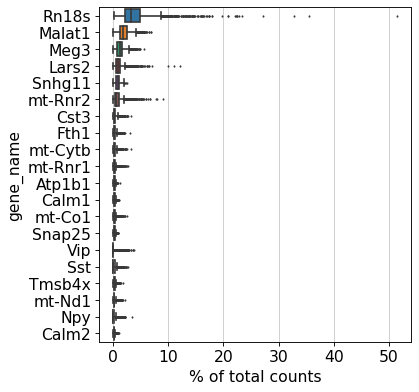

In [22]:
sc.pl.highest_expr_genes(adata, n_top=20, gene_symbols="gene_name")

In [23]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 17432 genes that are detected in less than 3 cells


In [11]:
adata.var['mt'] = adata.var.gene_name.str.startswith("mt-")

In [12]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

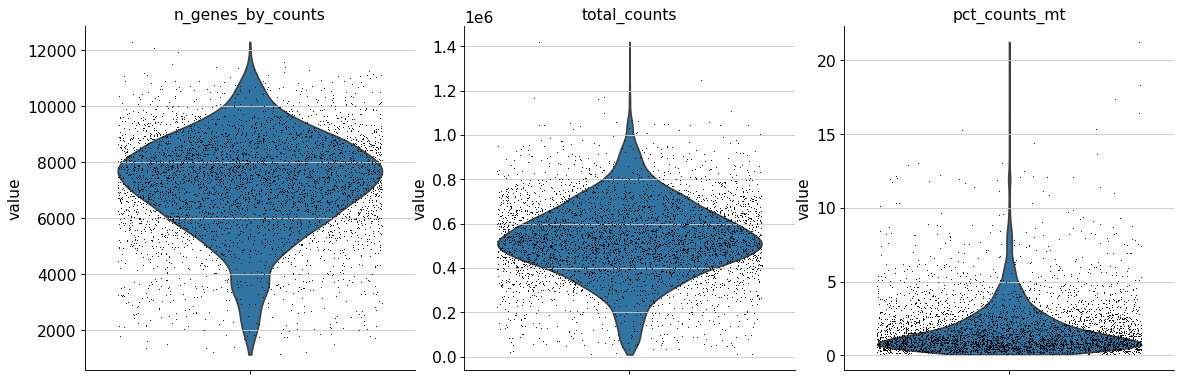

In [13]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

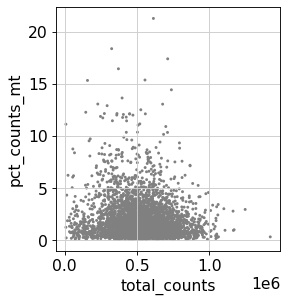

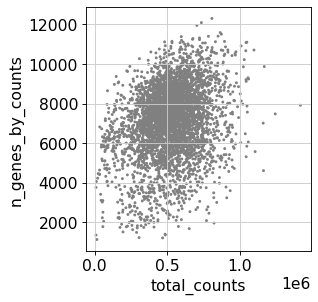

In [14]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [15]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

Total-count normalize (library-size correct) the data matrix $X$ to 10,000 reads per cell, so that counts become comparable among cells.

In [16]:
sc.pp.normalize_total(adata, target_sum=1e4)

/nethome/kcni/nxu/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


Logarithmize the data:

In [17]:
sc.pp.log1p(adata)

Identify highly-variable genes.

In [18]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


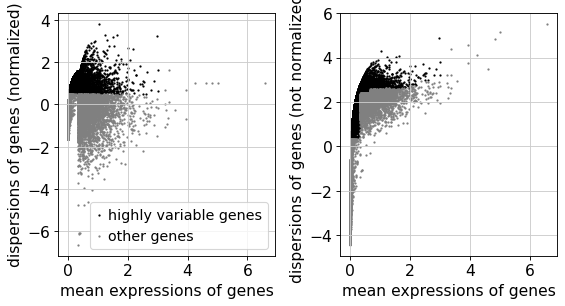

In [19]:
sc.pl.highly_variable_genes(adata)

In [22]:

adata.write("/nethome/kcni/nxu/scQuint/results/scanpy_tutorial.h5ad")